# Project: Wrangle and Analyze data
 ## Name: Soyoung Cho

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Gathering data</a></li>
        <li><a href="#wrangling">Assessing data</a></li>
        <li><a href="#wrangling">Cleaning data</a></li>   
<li><a href="#eda">Insight 1</a></li>
        <li><a href="#wrangling">Insight 2</a></li>
    <li><a href="#wrangling">Insight 3</a></li>
<li><a href="#conclusions">Insight 4</a></li>
</ul>

## Introduction

> The purpose of this paper is to wrangle and analze the data of "WeRateDags". The goal of this paper is to wrangle WeRateDogs twitter data and create interesting anf trustworthy analyses and visulizations. 

## Gathering Data

There are 3 types of data gathered for this project.
> 1. Twitter archive file
> 2. The tweet image predictions
> 3. Twitter API & JSON

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import requests
import tweepy 
import json

### 1. Twitter archive enhanced

In [31]:
twitter_arch = pd.read_csv('twitter-archive-enhanced.csv')
twitter_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 2. Tweet image prediction

In [34]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)
    
tweet_image = pd.read_csv('image-predictions.tsv',sep='\t')
tweet_image.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


### 3.Twitter API & JSON

In [36]:
import tweepy
from tweepy import OAuthHandler
import json
import csv
import sys
import os
import time


consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = 'Ptdoa0vglr3Q6pVUZ95Kl43hebzeRwilYTEuHEiRHIZ4H'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth, 
                 wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True)


In [37]:
tweet_ids = list(twitter_arch.tweet_id)

tweet_data = {}
for tweet in tweet_ids:
    try:
        tweet_status = api.get_status(tweet,
                                      wait_on_rate_limit=True, 
                                      wait_on_rate_limit_notify=True)
        tweet_data[str(tweet)] = tweet_status._json
    except: 
        print("Error " + str(tweet))

Error 888202515573088257
Error 873697596434513921
Error 872668790621863937
Error 872261713294495745
Error 869988702071779329
Error 866816280283807744
Rate limit reached. Sleeping for: 516
Error 861769973181624320
Error 856602993587888130
Error 845459076796616705
Error 844704788403113984
Error 842892208864923648
Error 837012587749474308
Error 827228250799742977
Error 812747805718642688
Error 802247111496568832
Error 775096608509886464
Error 770743923962707968
Error 754011816964026368
Rate limit reached. Sleeping for: 733
Error 680055455951884288
Rate limit reached. Sleeping for: 733


In [38]:
import json

with open('tweet_json.txt', 'w') as outfile:  
    json.dump(tweet_data, outfile, 
              sort_keys = True,
              indent=4,
              ensure_ascii = False)

In [39]:
import json
tweet_json = pd.read_json('tweet_json.txt',orient='index')

## Assessing the Data

### 1. twitter_arch

In [43]:
twitter_arch.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [44]:
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [45]:
twitter_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


### 2. tweet_image

In [46]:
tweet_image.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [47]:
tweet_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [48]:
tweet_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### 3. tweet_json

In [49]:
tweet_json.head(5)

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2513,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,494,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,125,0,NaN,666029285002620928,666029285002620928,...,NaN,NaN,NaN,46,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 17:16:52.701032449,NaN,NaN,2015-11-15 23:21:54,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/y6...,121,0,NaN,666033412701032448,666033412701032448,...,NaN,NaN,NaN,43,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 20:17:06.329800704,NaN,NaN,2015-11-16 00:04:52,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/DW...,290,0,NaN,666044226329800704,666044226329800704,...,NaN,NaN,NaN,135,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 21:40:48.165822465,NaN,NaN,2015-11-16 00:24:50,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/4B...,105,0,NaN,666049248165822464,666049248165822464,...,NaN,NaN,NaN,41,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,0,"{'contributors_enabled': False, 'created_at': ..."


In [50]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2337 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2337 non-null datetime64[ns]
entities                         2337 non-null object
extended_entities                1822 non-null object
favorite_count                   2337 non-null int64
favorited                        2337 non-null int64
geo                              0 non-null float64
id                               2337 non-null int64
id_str                           2337 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status                  23

In [51]:
tweet_json.describe()

,contributors,coordinates,favorite_count,favorited,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,truncated
count,0.0,0.0,2337.000000,2337.0,0.0,2.337000e+03,2.337000e+03,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,2337.000000,2203.0,2203.0,2.600000e+01,2.600000e+01,2337.000000,2337.0,2337.000000
mean,NaN,NaN,7850.395807,0.0,NaN,7.420692e+17,7.420692e+17,7.440692e+17,7.440692e+17,2.040329e+16,2.040329e+16,0.013265,0.0,0.0,8.113972e+17,8.113972e+17,2879.952503,0.0,0.104835
std,NaN,NaN,12168.283333,0.0,NaN,6.824243e+16,6.824243e+16,7.524295e+16,7.524295e+16,1.260797e+17,1.260797e+17,0.114431,0.0,0.0,6.295843e+16,6.295843e+16,4865.463135,0.0,0.306407
min,NaN,NaN,0.000000,0.0,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.000000,0.0,0.0,6.721083e+17,6.721083e+17,1.000000,0.0,0.000000
25%,NaN,NaN,1364.000000,0.0,NaN,6.783345e+17,6.783345e+17,6.757073e+17,6.757073e+17,3.589728e+08,3.589728e+08,0.000000,0.0,0.0,7.761338e+17,7.761338e+17,580.000000,0.0,0.000000
50%,NaN,NaN,3421.000000,0.0,NaN,7.185406e+17,7.185406e+17,7.032559e+17,7.032559e+17,4.196984e+09,4.196984e+09,0.000000,0.0,0.0,8.281173e+17,8.281173e+17,1346.000000,0.0,0.000000
75%,NaN,NaN,9621.000000,0.0,NaN,7.986825e+17,7.986825e+17,8.233264e+17,8.233264e+17,4.196984e+09,4.196984e+09,0.000000,0.0,0.0,8.637581e+17,8.637581e+17,3357.000000,0.0,0.000000
max,NaN,NaN,162304.000000,0.0,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,1.000000,0.0,0.0,8.860534e+17,8.860534e+17,82537.000000,0.0,1.000000


## Cleaning Data

I have to correct at least 8 quality issues and 2 tidiness issue in this section.

### Quality Issue
1. The number of rows in twitter archived enhaced data(2356) and tweet imaage prediction data(2075). This seems to occur due to retweets being included.
2. The type of 'timestamp' is 'object'; it has to be changed into correct data type.
3. Some values in the breeds in 'image prediction data', p1,p2,p3 have upper cases.
4. The type of 'tweet_id' has to be changed into correct data type.
5. There are many columns in dataframes; not all the informantion are needed for wrangling and analyzing the data. Some of the columns in twitter_arch should be dropped.
6. There are many columns in dataframes; not all the informantion are needed for wrangling and analyzing the data. Some of the columns in tweet_json should be dropped.
7. Some of the names are wrongly shown. When I have looked at the data in Excel(raw data), additional words such as "a", "not", "the"....etc makes names mislabelled more.
8. New rating column needed; easier to interpret.
9. Merge p1, p2, p3. Able to see the type of breed in one coulmn

### Tidiness Issue
1. Merge three datasets used for this project. Easier to oberve.
2. Combine each dog stage columns into a one column and named it as "dog stage"


In [52]:
twitter_arch_clean = twitter_arch.copy()
tweet_image_clean = tweet_image.copy()
tweet_json_clean = tweet_json.copy()

### Quality Issue

### 1. Define: 
removing the Retweets and Tweets without Pictures

### Code

In [53]:
twitter_arch_clean = twitter_arch_clean[np.isnan(twitter_arch_clean.retweeted_status_id)]
print(twitter_arch_clean.info())
twitter_arch_clean = twitter_arch_clean.drop(['retweeted_status_id', 
                        'retweeted_status_user_id', 
                        'retweeted_status_timestamp'], 
                       axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

As you can see above, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp are 0.

In [54]:
print(twitter_arch_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB
None


In [55]:
tweet_image_clean = tweet_image_clean[pd.notnull(tweet_image_clean['jpg_url'])]

In [56]:
print(tweet_image_clean.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 168.2+ KB
None


In [57]:
tweet_json_clean[tweet_json_clean['retweeted_status'].notnull()==True]

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-26 06:48:02.905632768,NaN,NaN,2015-11-20 03:51:47,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,0,0,NaN,667550882905632768,667550882905632768,...,NaN,NaN,NaN,33,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Unoriginal idea. Blatant ...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-26 06:48:24.950915073,NaN,NaN,2015-11-20 03:51:52,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/ua...,0,0,NaN,667550904950915072,667550904950915072,...,NaN,NaN,NaN,35,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,0,"{'contributors_enabled': False, 'created_at': ..."
1992-07-24 17:26:49.858043904,NaN,NaN,2016-03-21 19:31:59,"{'hashtags': [{'indices': [61, 73], 'text': 'L...",{'media': [{'display_url': 'pic.twitter.com/j6...,0,0,NaN,711998809858043904,711998809858043904,...,NaN,NaN,NaN,130,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,0,"{'contributors_enabled': False, 'created_at': ..."
1993-07-28 05:05:15.802583040,NaN,NaN,2016-06-17 16:01:16,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",NaN,0,0,NaN,743835915802583040,743835915802583040,...,NaN,NaN,NaN,2195,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,0,"{'contributors_enabled': False, 'created_at': ..."
1993-08-28 07:04:05.350707200,NaN,NaN,2016-06-25 01:52:36,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",NaN,0,0,NaN,746521445350707200,746521445350707200,...,NaN,NaN,NaN,1037,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,0,"{'contributors_enabled': False, 'created_at': ..."
1993-09-05 15:18:28.580548608,NaN,NaN,2016-06-27 01:37:04,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",NaN,0,0,NaN,747242308580548608,747242308580548608,...,NaN,NaN,NaN,3034,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This pupper killed this great w...,0,"{'contributors_enabled': False, 'created_at': ..."
1993-11-03 06:49:54.570878976,NaN,NaN,2016-07-11 01:11:51,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'additional_media_info': {'monetiz...,0,0,NaN,752309394570878976,752309394570878976,...,NaN,NaN,NaN,17760,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Everyone needs to watch this. 1...,0,"{'contributors_enabled': False, 'created_at': ..."
1993-11-07 19:52:24.171524096,NaN,NaN,2016-07-12 03:11:42,"{'hashtags': [], 'symbols': [], 'urls': [{'dis...",NaN,0,0,NaN,752701944171524096,752701944171524096,...,NaN,NaN,NaN,3075,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: HEY PUP WHAT'S THE PART OF THE ...,0,"{'contributors_enabled': False, 'created_at': ..."
1993-11-14 17:37:14.498793472,NaN,NaN,2016-07-13 18:42:44,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",NaN,0,0,NaN,753298634498793472,753298634498793472,...,NaN,NaN,NaN,6115,0,"{'contributors': None, 'coordinates': None, 'c...","<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Carly. She's actually 2...,0,"{'contributors_enabled': False, 'created_at': ..."
1993-12-02 23:27:21.593970688,NaN,NaN,2016-07-18 03:

### Test

In [58]:
tweet_json_clean.drop(tweet_json_clean[tweet_json_clean['retweeted_status'].notnull()== True].index,inplace=True)

In [59]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2171 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2171 non-null datetime64[ns]
entities                         2171 non-null object
extended_entities                1747 non-null object
favorite_count                   2171 non-null int64
favorited                        2171 non-null int64
geo                              0 non-null float64
id                               2171 non-null int64
id_str                           2171 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status                  21

### 2. Define:
Datatype of 'timestamp'. Currently, 'timestamp' datatype is 'object'; it has to be cahenged into 'datetime object'.

### Code

In [60]:
twitter_arch_clean['timestamp'] = twitter_arch_clean['timestamp'].str.slice(start=0, stop=-6)

In [61]:
twitter_arch_clean['timestamp'] = pd.to_datetime(twitter_arch_clean['timestamp'], format = "%Y-%m-%d %H:%M:%S")

### Test

In [62]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 254.9+ KB


As you can see above, the datatype of 'timestamp' has cahnged intp datetime.

In [63]:
twitter_arch_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### 3. Define:
Refinment of names in p1, p2, p3

### Code

In [64]:
tweet_image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [65]:
tweet_image_clean['p1'] = tweet_image_clean['p1'].str.replace('_', ' ')
tweet_image_clean['p2'] = tweet_image_clean['p2'].str.replace('_', ' ')
tweet_image_clean['p3'] = tweet_image_clean['p3'].str.replace('_', ' ')

In [66]:
tweet_image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [67]:
tweet_image_clean['p1'] = tweet_image_clean['p1'].str.title()
tweet_image_clean['p2'] = tweet_image_clean['p2'].str.title()
tweet_image_clean['p3'] = tweet_image_clean['p3'].str.title()

### Test

In [68]:
tweet_image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### 4. Define:
Datatype of 'tweet_id'. The datatype of 'tweet_id' has to be 'string'.

### Code

In [69]:
tweet_image_clean.tweet_id = tweet_image_clean.tweet_id.astype(str)

In [70]:
type(tweet_image_clean['tweet_id'].iloc[0])

str

In [71]:
twitter_arch_clean.tweet_id = twitter_arch_clean.tweet_id.astype(str)

In [72]:
type(twitter_arch_clean['tweet_id'].iloc[0])

str

We have to first rename the column called 'id' in tweet_json data into 'tweet_id' in order to match with others.

In [73]:
tweet_json_clean.columns

Index(['contributors', 'coordinates', 'created_at', 'entities',
       'extended_entities', 'favorite_count', 'favorited', 'geo', 'id',
       'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'retweet_count',
       'retweeted', 'retweeted_status', 'source', 'text', 'truncated', 'user'],
      dtype='object')

In [74]:
tweet_json_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

In [75]:
tweet_json_clean.columns

Index(['contributors', 'coordinates', 'created_at', 'entities',
       'extended_entities', 'favorite_count', 'favorited', 'geo', 'tweet_id',
       'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'retweet_count',
       'retweeted', 'retweeted_status', 'source', 'text', 'truncated', 'user'],
      dtype='object')

In [76]:
tweet_json_clean.tweet_id = tweet_json_clean.tweet_id.astype(str)

### Test

In [77]:
type(tweet_json_clean['tweet_id'].iloc[0])

str

### 5. Define:
Drop columns in twitter_arch data

### Code

In [78]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(9)
memory usage: 254.9+ KB


In [79]:
twitter_arch_clean.drop(['text','in_reply_to_status_id',
               'in_reply_to_user_id',
               'source',
               'in_reply_to_status_id',
               'text',
               'expanded_urls'], axis=1,inplace=True)

### Test

In [80]:
twitter_arch_clean.head()

,tweet_id,timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,12,10,Franklin,None,None,None,None


### 6. Define:
Drop columns in tweet_json data

### Code

In [81]:
tweet_json_clean.drop(['contributors',
                     'coordinates',
                     'created_at',
                     'entities',
                     'extended_entities',
                     'geo',
                     'id_str',
                     'in_reply_to_screen_name',
                     'in_reply_to_status_id',
                     'in_reply_to_status_id_str',
                     'in_reply_to_user_id',
                     'in_reply_to_user_id_str',
                     'is_quote_status',
                     'lang',
                     'place',
                     'possibly_sensitive',
                     'possibly_sensitive_appealable',
                     'quoted_status',
                     'quoted_status_id',
                     'quoted_status_id_str',
                     'retweeted',
                     'retweeted_status',
                     'source',
                     'truncated',
                     'user'], axis=1,inplace=True)

In [82]:
tweet_json_clean.head(5)

,favorite_count,favorited,tweet_id,retweet_count,text
1991-02-08 13:48:08.022790149,2513,0,666020888022790144,494,Here we have a Japanese Irish Setter. Lost eye...
1991-02-08 16:08:05.002620928,125,0,666029285002620928,46,This is a western brown Mitsubishi terrier. Up...
1991-02-08 17:16:52.701032449,121,0,666033412701032448,43,Here is a very happy pup. Big fan of well-main...
1991-02-08 20:17:06.329800704,290,0,666044226329800704,135,This is a purebred Piers Morgan. Loves to Netf...
1991-02-08 21:40:48.165822465,105,0,666049248165822464,41,Here we have a 1949 1st generation vulpix. Enj...


In [83]:
tweet_json_clean.drop(['favorited'], axis=1,inplace=True)

### Test

In [84]:
tweet_json_clean.head(5)

,favorite_count,tweet_id,retweet_count,text
1991-02-08 13:48:08.022790149,2513,666020888022790144,494,Here we have a Japanese Irish Setter. Lost eye...
1991-02-08 16:08:05.002620928,125,666029285002620928,46,This is a western brown Mitsubishi terrier. Up...
1991-02-08 17:16:52.701032449,121,666033412701032448,43,Here is a very happy pup. Big fan of well-main...
1991-02-08 20:17:06.329800704,290,666044226329800704,135,This is a purebred Piers Morgan. Loves to Netf...
1991-02-08 21:40:48.165822465,105,666049248165822464,41,Here we have a 1949 1st generation vulpix. Enj...


### 7. Define:
Names corrections

### Code

In [85]:
twitter_arch_clean['name'].replace("a", 'None', inplace=True)
twitter_arch_clean['name'].replace("an", 'None', inplace=True)
twitter_arch_clean['name'].replace("all", 'None', inplace=True)
twitter_arch_clean['name'].replace("actually", 'None', inplace=True)
twitter_arch_clean['name'].replace("by", 'None', inplace=True)
twitter_arch_clean['name'].replace("just", 'None', inplace=True)
twitter_arch_clean['name'].replace("my", 'None', inplace=True)
twitter_arch_clean['name'].replace("not", 'None', inplace=True)
twitter_arch_clean['name'].replace("the", 'None', inplace=True)
twitter_arch_clean['name'].replace("this", 'None', inplace=True)
twitter_arch_clean['name'].replace("such", 'None', inplace=True)
twitter_arch_clean['name'].replace("old", 'None', inplace=True)
twitter_arch_clean['name'].replace("very", 'None', inplace=True)
twitter_arch_clean['name'].replace("quiet", 'None', inplace=True)


### Test

In [86]:
twitter_arch_clean

,tweet_id,timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12,13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40,13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51,14,10,Cassie,doggo,None,None,None


### 8. Define:
New ratings column

### Code

In [87]:
twitter_arch_clean.rating_numerator.value_counts()

12      500
10      442
11      426
13      307
9       156
8        98
7        54
14       43
5        36
6        32
3        19
4        17
2         9
1         8
420       2
0         2
20        1
24        1
26        1
84        1
44        1
50        1
60        1
80        1
165       1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
15        1
17        1
27        1
45        1
75        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [88]:
twitter_arch_clean.rating_denominator.value_counts()

10     2153
50        3
80        2
11        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [89]:
twitter_arch_clean[twitter_arch_clean['rating_denominator'] != 10]

,tweet_id,timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,2017-02-24 21:54:03,960,0,None,None,None,None,None
342,832088576586297345,2017-02-16 04:45:50,11,15,None,None,None,None,None
433,820690176645140481,2017-01-15 17:52:40,84,70,None,None,None,None,None
516,810984652412424192,2016-12-19 23:06:23,24,7,Sam,None,None,None,None
902,758467244762497024,2016-07-28 01:00:57,165,150,None,None,None,None,None
1068,740373189193256964,2016-06-08 02:41:38,9,11,None,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54,204,170,None,None,None,None,None
1165,722974582966214656,2016-04-21 02:25:47,4,20,None,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11,50,50,Bluebert,None,None,None,None
1228,713900603437621249,2016-03-27 01:29:02,99,90,None,None,None,None,None


In [90]:
twitter_arch_clean['rating_numerator'] = twitter_arch_clean['rating_numerator'].astype(float)
twitter_arch_clean['rating_denominator'] = twitter_arch_clean['rating_denominator'].astype(float)

In [91]:
twitter_arch_clean['rating'] = twitter_arch_clean['rating_numerator'] / twitter_arch_clean['rating_denominator']

In [92]:
twitter_arch_clean.head(3)

,tweet_id,timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,2017-08-01 16:23:56,13.0,10.0,Phineas,None,None,None,None,1.3
1,892177421306343426,2017-08-01 00:17:27,13.0,10.0,Tilly,None,None,None,None,1.3
2,891815181378084864,2017-07-31 00:18:03,12.0,10.0,Archie,None,None,None,None,1.2


In [93]:
twitter_arch_clean.drop(['rating_numerator','rating_denominator'], axis=1,inplace=True)

### Test

In [94]:
twitter_arch_clean.head(3)

,tweet_id,timestamp,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,2017-08-01 16:23:56,Phineas,None,None,None,None,1.3
1,892177421306343426,2017-08-01 00:17:27,Tilly,None,None,None,None,1.3
2,891815181378084864,2017-07-31 00:18:03,Archie,None,None,None,None,1.2


### 9. Define: 
Merger of types of breeds

### Code

In [95]:
breed = []
confidence = []

def type_breed(row):
    if row['p1_dog'] == True:
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append('Unidentifiable')
        confidence.append(0)

tweet_image_clean.apply(type_breed, axis=1)
tweet_image_clean['breed'] = breed
tweet_image_clean['confidence'] = confidence
tweet_image_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True,Welsh Springer Spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True,German Shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True,Rhodesian Ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,Miniature Pinscher,0.560311


In [96]:
tweet_image_clean.drop(['p1',
               'p1_conf',
               'p1_dog',
               'p2',
               'p2_conf',
               'p2_dog',
               'p3',
               'p3_conf',
               'p3_dog'], axis=1,inplace=True)

### Test

In [97]:
tweet_image_clean.head(3)

,tweet_id,jpg_url,img_num,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461


### Tidiness Issue

### 1. Define: 
Merger of  "Dog Stages" columns into one column

### Code

In [131]:
twitter_arch_clean['dog_stage'] = twitter_arch_clean[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ''.join(x), axis=1)

In [132]:
twitter_arch_clean.dog_stage.value_counts()

NoneNoneNoneNone        1831
NoneNonepupperNone       224
doggoNoneNoneNone         75
NoneNoneNonepuppo         24
doggoNonepupperNone       10
NoneflooferNoneNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: dog_stage, dtype: int64

In [133]:
twitter_arch_clean.loc[twitter_arch_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'multiple'
twitter_arch_clean.loc[twitter_arch_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'multiple'
twitter_arch_clean.loc[twitter_arch_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'multiple'
twitter_arch_clean.loc[twitter_arch_clean.dog_stage == '', 'dog_stage'] = np.nan
twitter_arch_clean.dog_stage.value_counts()

NoneNoneNoneNone        1831
NoneNonepupperNone       224
doggoNoneNoneNone         75
NoneNoneNonepuppo         24
doggoNonepupperNone       10
NoneflooferNoneNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: dog_stage, dtype: int64

In [134]:
twitter_arch_clean['dog_stage'].replace("NoneNoneNoneNone","None ", inplace=True)
twitter_arch_clean['dog_stage'].replace("doggoNoneNoneNone","doggo", inplace=True)
twitter_arch_clean['dog_stage'].replace("NoneflooferNoneNone","floofer", inplace=True)
twitter_arch_clean['dog_stage'].replace("NoneNonepupperNone","pupper", inplace=True)
twitter_arch_clean['dog_stage'].replace("NoneNoneNonepuppo","puppo", inplace=True)
twitter_arch_clean['dog_stage'].replace("doggoNonepupperNone","multiple", inplace=True)
twitter_arch_clean['dog_stage'].replace("doggoNoneNonepuppo","multiple", inplace=True)
twitter_arch_clean['dog_stage'].replace("doggoflooferNoneNone","multiple", inplace=True)

In [136]:
twitter_arch_clean.dog_stage.value_counts()

None        1831
pupper       224
doggo         75
puppo         24
multiple      12
floofer        9
Name: dog_stage, dtype: int64

In [142]:
twitter_arch_clean[['dog_stage','doggo', 'floofer', 'pupper', 'puppo']].head(5)

,dog_stage,doggo,floofer,pupper,puppo
0,None,None,None,None,None
1,None,None,None,None,None
2,None,None,None,None,None
3,None,None,None,None,None
4,None,None,None,None,None


In [143]:
twitter_arch_clean = twitter_arch_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

### Test

In [144]:
twitter_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 6 columns):
tweet_id     2175 non-null object
timestamp    2175 non-null datetime64[ns]
name         2175 non-null object
rating       2175 non-null float64
dog_stage    2175 non-null object
stage        0 non-null object
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 118.9+ KB


In [145]:
twitter_arch_clean[twitter_arch_clean['dog_stage']=='multiple']

,tweet_id,timestamp,name,rating,dog_stage,stage
191,855851453814013952,2017-04-22 18:31:02,None,1.3,multiple,NaN
200,854010172552949760,2017-04-17 16:34:26,None,1.1,multiple,NaN
460,817777686764523521,2017-01-07 16:59:28,Dido,1.3,multiple,NaN
531,808106460588765185,2016-12-12 00:29:28,None,1.2,multiple,NaN
565,802265048156610565,2016-11-25 21:37:47,None,1.1,multiple,NaN
575,801115127852503040,2016-11-22 17:28:25,Bones,1.2,multiple,NaN
705,785639753186217984,2016-10-11 00:34:48,Pinot,1.0,multiple,NaN
733,781308096455073793,2016-09-29 01:42:20,None,1.2,multiple,NaN
889,759793422261743616,2016-07-31 16:50:42,Maggie,1.2,multiple,NaN
956,751583847268179968,2016-07-09 01:08:47,None,0.5,multiple,NaN


As you can see above, there were 4 columns which contained the information about dog stage: doggo, floofer, pupper and puppo. I have merged those 4 columns into one and named it as "dog stage". I have also contained the multiple variable because there were some dogs with two stages.

### 2. Define: 
Merger of all the datasets used in this project: twitter_arch, tweet_image, tweet_json

### Code

In [146]:
twitter_0 = pd.merge(twitter_arch_clean, tweet_json_clean, left_on = 'tweet_id', right_on = 'tweet_id', how = 'inner')

In [147]:
twitter = pd.merge(twitter_0, tweet_image_clean, left_on = 'tweet_id', right_on = 'tweet_id', how = 'inner')

### Test

In [148]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1297 entries, 0 to 1296
Data columns (total 13 columns):
tweet_id          1297 non-null object
timestamp         1297 non-null datetime64[ns]
name              1297 non-null object
rating            1297 non-null float64
dog_stage         1297 non-null object
stage             0 non-null object
favorite_count    1297 non-null int64
retweet_count     1297 non-null int64
text              1297 non-null object
jpg_url           1297 non-null object
img_num           1297 non-null int64
breed             1297 non-null object
confidence        1297 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(7)
memory usage: 141.9+ KB


## Saving the Data with new name

In [149]:
twitter.to_csv('twitter_archive_refine.csv', index=False)

In [150]:
refine_arch = pd.read_csv('twitter_archive_refine.csv')

In [151]:
refine_arch.sample(3)

,tweet_id,timestamp,name,rating,dog_stage,stage,favorite_count,retweet_count,text,jpg_url,img_num,breed,confidence
324,778990705243029504,2016-09-22 16:13:51,Jay,1.1,None,NaN,21053,7805,This is Jay. He's really h*ckin happy about th...,https://pbs.twimg.com/media/Cs-H5uhWcAAiNY9.jpg,2,Cocker Spaniel,0.715351
1143,670040295598354432,2015-11-27 00:43:49,None,1.0,None,NaN,755,113,😂😂😂 10/10 for the dog and the owner https://t....,https://pbs.twimg.com/media/CUx2F6lVEAAvFev.jpg,1,Borzoi,0.026660
870,680221482581123072,2015-12-25 03:00:14,CeCe,1.0,None,NaN,1514,305,This is CeCe. She's patiently waiting for Sant...,https://pbs.twimg.com/media/CXCh0QZW8AALdXm.jpg,1,Unidentifiable,0.000000


## Analyzing and Visualization of Data

In [152]:
df = refine_arch

### Descriptive Analysis

In [153]:
print('\n')
desc= refine_arch.drop(['tweet_id'], axis=1)

desc.describe()

,rating,stage,favorite_count,retweet_count,img_num,confidence
count,1297.000000,0.0,1297.000000,1297.000000,1297.000000,1297.000000
mean,1.223538,NaN,8035.976870,2420.283732,1.187355,0.460126
std,5.039810,NaN,11254.015039,3923.190768,0.541113,0.337762
min,0.100000,NaN,77.000000,11.000000,1.000000,0.000000
25%,1.000000,NaN,1658.000000,555.000000,1.000000,0.140394
50%,1.100000,NaN,3714.000000,1211.000000,1.000000,0.456047
75%,1.200000,NaN,9907.000000,2867.000000,1.000000,0.767563
max,177.600000,NaN,125439.000000,60190.000000,4.000000,0.999956


I will highlight some of the numbers in the above table. First, the mean of rating is 1.22. Second, the mean of favourite count is 8036. Third, the mean of retweet count is 2420. 

### Insight 1. Which type of breeds has highest ratings?

Text(0,0.5,'Breed')

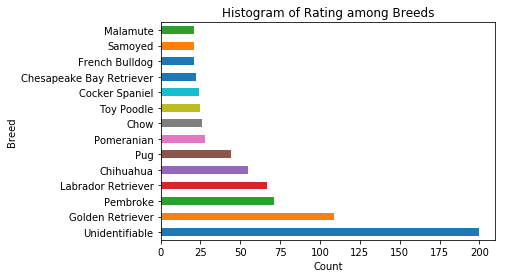

In [154]:
high_breed=df.groupby('breed').filter(lambda x: len(x) >= 20)
high_breed['breed'].value_counts().plot(kind = 'barh')
plt.title('Histogram of Rating among Breeds')
plt.xlabel('Count')
plt.ylabel('Breed')

If you see the histogram above, many of the type of dogs are unidentifiable. However, next to 'identifiable type', Golden Retriever has highest count. The ranking of the breed does not mean they are top breeds. The higher ranking they are, it refers that they are more commonly shown in the WeRateDogs page.

### Insight 2. What is the relationship between the retweet and favourite counts?

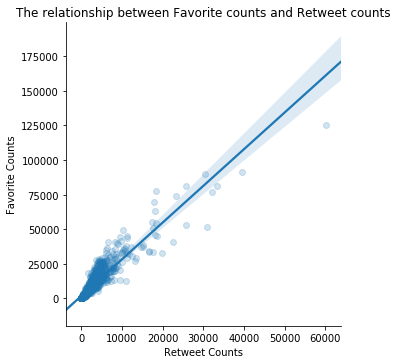

In [158]:
sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=twitter,
           scatter_kws={'alpha':1/5})
plt.title('The relationship between Favorite counts and Retweet counts')
plt.xlabel('Retweet Counts')
plt.ylabel('Favorite Counts');

If you see the scatterplot above, the graph is trying to figure the relationship between retweets counts and favourite counts. The line of the graph are heading towards right top corner which refers that the relationship between those two variables are positive. Most of retweets and fovourite counts are positioned along and below 20000 and 50000. This can be interpreted as every 1 retweets has approximately 2.5 favourite.

### Insight 3. What are the most popular name?

In [159]:
name_count = df['name'].value_counts()
name_count.head(11)

None       428
Oliver       8
Winston      7
Tucker       7
Penny        6
Lucy         6
Cooper       6
Lola         5
Bella        5
Sadie        5
Bailey       5
Name: name, dtype: int64

As you can see above, 428 tweets was unable to recognized the name of the dog. The top 11 popular dog names are Oliver, Winston, Tucker, Penny, Lucy, Cooper, Lola, Bella, Sadie and Bailey.

### Insight 4. Who has recived the highest and lowest rating?

In [160]:
df[df['rating']==177.6]

,tweet_id,timestamp,name,rating,dog_stage,stage,favorite_count,retweet_count,text,jpg_url,img_num,breed,confidence
450,749981277374128128,2016-07-04 15:00:45,Atticus,177.6,None,NaN,5313,2605,This is Atticus. He's quite simply America af....,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,Unidentifiable,0.0


In [161]:
df[df['rating']==0.1]

,tweet_id,timestamp,name,rating,dog_stage,stage,favorite_count,retweet_count,text,jpg_url,img_num,breed,confidence
963,675153376133427200,2015-12-11 03:21:23,None,0.1,None,NaN,6368,2682,What kind of person sends in a picture without...,https://pbs.twimg.com/media/CV6gaUUWEAAnETq.jpg,1,Unidentifiable,0.0
1232,667549055577362432,2015-11-20 03:44:31,None,0.1,None,NaN,5770,2296,Never seen dog like this. Breathes heavy. Tilt...,https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg,1,Unidentifiable,0.0
1287,666104133288665088,2015-11-16 04:02:55,None,0.1,None,NaN,13951,6331,Not familiar with this breed. No tail (weird)....,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,Unidentifiable,0.0


The dog name 'Atticus' has recieved the highest rating of 177.6 (outlier). And three dogs who cannot be identified with their name has lowest rating of 0.1.